In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from src.preprocessing.preprocessing_functions import *
from src.preprocessing.process_modelling_data import get_modelling_data

## Load the modelling data

In [10]:
six_cities_df_X = six_cities_df.copy()
(X_train, X_val, X_test, X_train_pca, X_val_pca, X_test_pca, y_train, y_val, y_test) = get_modelling_data()

## AdaBoost Feature Importance

In [170]:
from sklearn.inspection import permutation_importance

clf_ab = AdaBoostClassifier(n_estimators=800, random_state=0, learning_rate=1)
clf_ab.fit(X_train, y_train)

# result = permutation_importance(
#     clf_ab, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
# )

# feature_names=list(X_train.columns)
# imp_m   = pd.Series(result.importances_mean, index=feature_names, name='Importance')
# imp_std = pd.Series(result.importances_std, index=feature_names, name='Std')
# imp_df = pd.concat([imp_m, imp_std], axis=1)
# imp_df = imp_df.sort_values('Importance', ascending=False)
# imp_df = imp_df.iloc[:15][::-1]

# plt.figure(figsize=(5, 8))
# y_pos = np.arange(len(imp_df.index))
# plt.barh(y_pos, imp_df.Importance, xerr=imp_df.Std, align='center', alpha=0.5, ecolor='black', capsize=4, height=0.7)
# plt.xlabel('Importance Score')
# plt.yticks(y_pos)
# plt.yticks(y_pos, imp_df.index)
# plt.title('AdaBoost: Top 15 Important Features')
# plt.gca().xaxis.grid(True)
# plt.show()

AdaBoostClassifier(learning_rate=1, n_estimators=800, random_state=0)

## XGBoost Feature Importance

In [169]:
clf_xg = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=20, \
                learning_rate=0.3, reg_alpha=0.1, reg_lambda=10)
clf_xg.fit(X_train, y_train)

# result_xg = permutation_importance(
#     clf_xg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
# )

# feature_names=list(X_train.columns)
# imp_m   = pd.Series(result_xg.importances_mean, index=feature_names, name='Importance')
# imp_std = pd.Series(result_xg.importances_std, index=feature_names, name='Std')
# imp_df = pd.concat([imp_m, imp_std], axis=1)
# imp_df = imp_df.sort_values('Importance', ascending=False)
# imp_df = imp_df.iloc[:15][::-1]

# plt.figure(figsize=(5, 8))
# y_pos = np.arange(len(imp_df.index))
# plt.barh(y_pos, imp_df.Importance, xerr=imp_df.Std, align='center', alpha=0.5, ecolor='black', capsize=4, height=0.7)
# plt.xlabel('Importance Score')
# plt.yticks(y_pos)
# plt.yticks(y_pos, imp_df.index)
# plt.title('XGBoost: Top 15 Important Features')
# plt.gca().xaxis.grid(True)
# plt.show()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=100, n_estimators=100, n_jobs=8, num_parallel_tree=1,
              random_state=42, reg_alpha=0.1, reg_lambda=10, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

## Gradient Boosting Feature Importance

/Users/sanjeevsingh/opt/anaconda3/envs/py3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


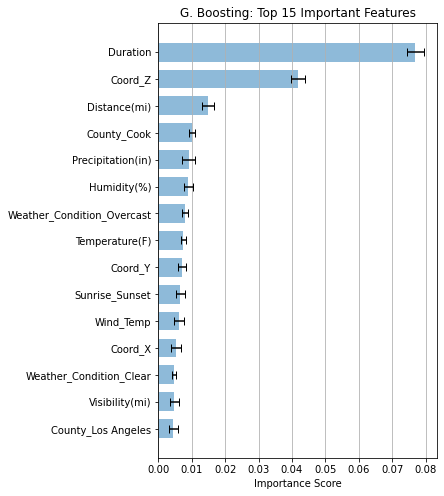

In [167]:
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
            max_depth=20, random_state=0).fit(X_train, y_train)


result_gb = permutation_importance(
    clf_gb, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

feature_names=list(X_train.columns)
imp_m   = pd.Series(result_gb.importances_mean, index=feature_names, name='Importance')
imp_std = pd.Series(result_gb.importances_std, index=feature_names, name='Std')
imp_df = pd.concat([imp_m, imp_std], axis=1)
imp_df = imp_df.sort_values('Importance', ascending=False)
imp_df = imp_df.iloc[:15][::-1]

plt.figure(figsize=(5, 8))
y_pos = np.arange(len(imp_df.index))
plt.barh(y_pos, imp_df.Importance, xerr=imp_df.Std, align='center', alpha=0.5, ecolor='black', capsize=4, height=0.7)
plt.xlabel('Importance Score')
plt.yticks(y_pos)
plt.yticks(y_pos, imp_df.index)
plt.title('G. Boosting: Top 15 Important Features')
plt.gca().xaxis.grid(True)
plt.show()

## Random Forest Feature Importance

In [171]:
from sklearn.ensemble import RandomForestClassifier

best_param_dict = {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto',
                   'max_depth': None, 'criterion': 'gini'}
    
clf_rf = RandomForestClassifier(random_state = 44,
                                n_estimators = best_param_dict['n_estimators'],
                                max_depth = best_param_dict['max_depth'],
                                min_samples_split = best_param_dict['min_samples_split'], 
                                min_samples_leaf = best_param_dict['min_samples_leaf'],
                                criterion = best_param_dict['criterion'],
                                max_features = best_param_dict['max_features']).fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

# result_rf = permutation_importance(
#     clf_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
# )

# feature_names=list(X_train.columns)
# imp_m   = pd.Series(result_rf.importances_mean, index=feature_names, name='Importance')
# imp_std = pd.Series(result_rf.importances_std, index=feature_names, name='Std')
# imp_df = pd.concat([imp_m, imp_std], axis=1)
# imp_df = imp_df.sort_values('Importance', ascending=False)
# imp_df = imp_df.iloc[:15][::-1]

# plt.figure(figsize=(5, 8))
# y_pos = np.arange(len(imp_df.index))
# plt.barh(y_pos, imp_df.Importance, xerr=imp_df.Std, align='center', alpha=0.5, ecolor='black', capsize=4, height=0.7)
# plt.xlabel('Importance Score')
# plt.yticks(y_pos)
# plt.yticks(y_pos, imp_df.index)
# plt.title('Random Forest: Top 15 Important Features')
# plt.gca().xaxis.grid(True)
# plt.show()

## Probability Distribution of Classifiers

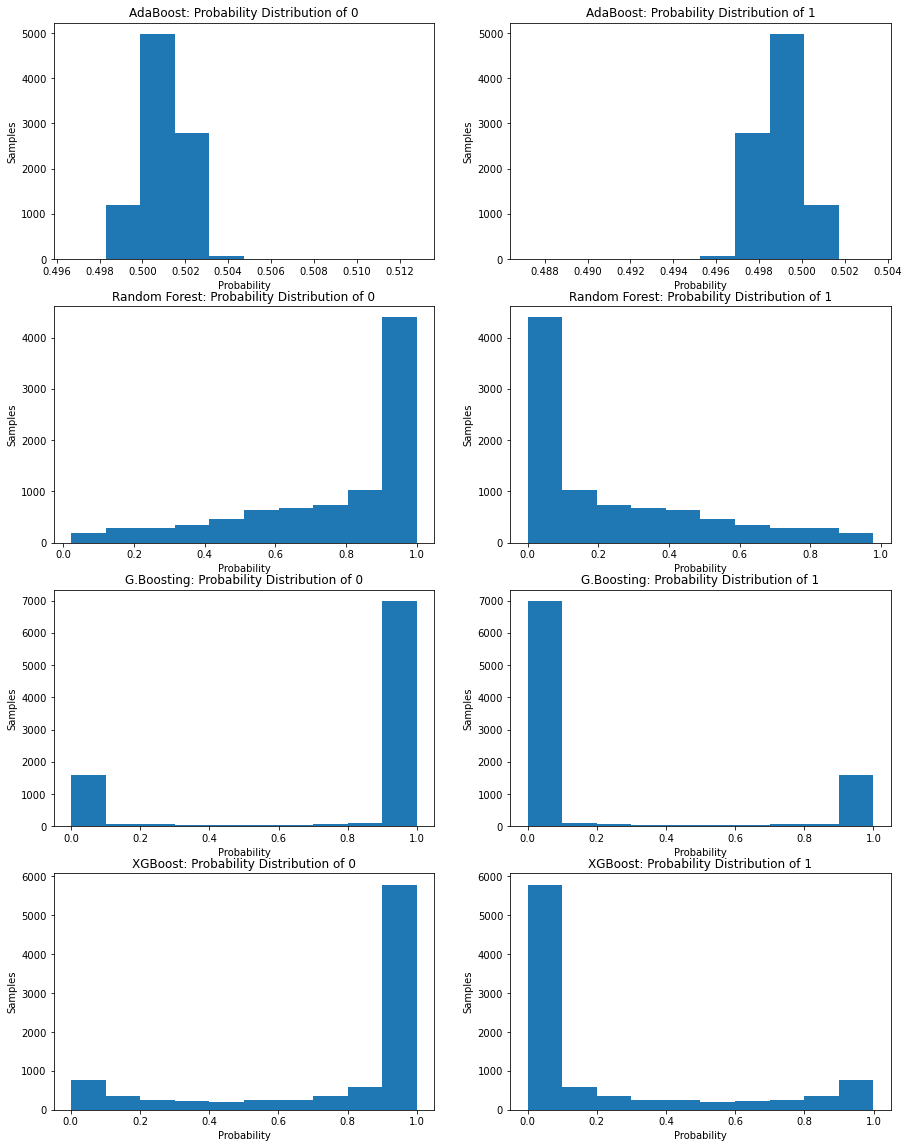

In [174]:
y_prob_ab=clf_ab.predict_proba(X_test)
y_prob_xg=clf_xg.predict_proba(X_test)
y_prob_rf=clf_rf.predict_proba(X_test)
y_prob_gb=clf_gb.predict_proba(X_test)

fig, axs = plt.subplots(4, 2, figsize=(15,20))  

axs[0,0].hist(y_prob_ab[:,0])
axs[0,0].set_title("AdaBoost: Probability Distribution of 0")
axs[0,0].set_xlabel("Probability")
axs[0,0].set_ylabel("Samples")

axs[0,1].hist(y_prob_ab[:,1])
axs[0,1].set_title("AdaBoost: Probability Distribution of 1")
axs[0,1].set_xlabel("Probability")
axs[0,1].set_ylabel("Samples")

axs[1,0].hist(y_prob_rf[:,0])
axs[1,0].set_title("Random Forest: Probability Distribution of 0")
axs[1,0].set_xlabel("Probability")
axs[1,0].set_ylabel("Samples")

axs[1,1].hist(y_prob_rf[:,1])
axs[1,1].set_title("Random Forest: Probability Distribution of 1")
axs[1,1].set_xlabel("Probability")
axs[1,1].set_ylabel("Samples")

axs[2,0].hist(y_prob_gb[:,0])
axs[2,0].set_title("G.Boosting: Probability Distribution of 0")
axs[2,0].set_xlabel("Probability")
axs[2,0].set_ylabel("Samples")

axs[2,1].hist(y_prob_gb[:,1])
axs[2,1].set_title("G.Boosting: Probability Distribution of 1")
axs[2,1].set_xlabel("Probability")
axs[2,1].set_ylabel("Samples")

axs[3,0].hist(y_prob_xg[:,0])
axs[3,0].set_title("XGBoost: Probability Distribution of 0")
axs[3,0].set_xlabel("Probability")
axs[3,0].set_ylabel("Samples")

axs[3,1].hist(y_prob_xg[:,1])
axs[3,1].set_title("XGBoost: Probability Distribution of 1")
axs[3,1].set_xlabel("Probability")
axs[3,1].set_ylabel("Samples")

plt.show()

## Learning Curve XGBoost

### Max-Depth=8

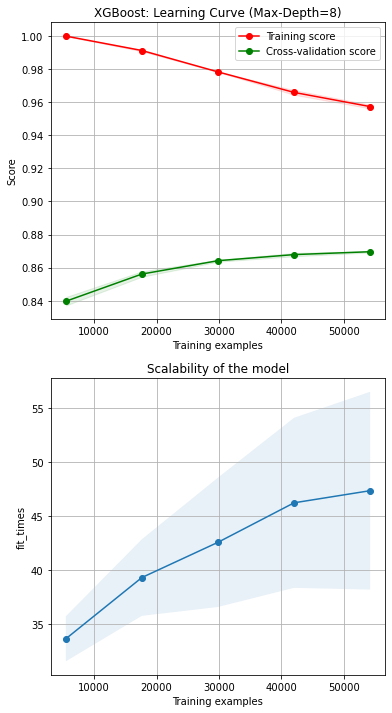

In [148]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

from sklearn.model_selection import learning_curve
clf_xg = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=8, \
                learning_rate=0.3)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    clf_xg,
    X_train,
    y_train,
    cv=4,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

fig, axs = plt.subplots(2, 1, figsize=(6,12)) 

axs[0].grid()
axs[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axs[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axs[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axs[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axs[0].legend(loc="best")
axs[0].set_xlabel("Training examples")
axs[0].set_ylabel("Score")
axs[0].set_title("XGBoost: Learning Curve (Max-Depth=8)")

axs[1].grid()
axs[1].plot(train_sizes, fit_times_mean, "o-")
axs[1].fill_between(
    train_sizes,
    fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std,
    alpha=0.1,
)
axs[1].set_xlabel("Training examples")
axs[1].set_ylabel("fit_times")
axs[1].set_title("Scalability of the model")

plt.show()
    

### Max-Depth=20

/Users/sanjeevsingh/opt/anaconda3/envs/py3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


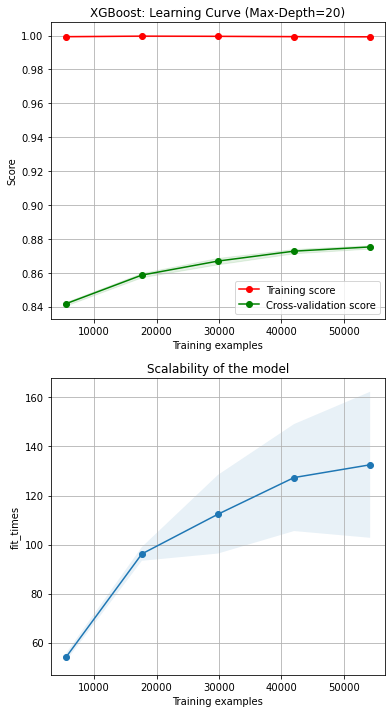

In [149]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

from sklearn.model_selection import learning_curve
clf_xg = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=20, \
                learning_rate=0.3, reg_alpha=0.1, reg_lambda=10)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    clf_xg,
    X_train,
    y_train,
    cv=4,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

fig, axs = plt.subplots(2, 1, figsize=(6,12)) 

axs[0].grid()
axs[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axs[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axs[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axs[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axs[0].legend(loc="best")
axs[0].set_xlabel("Training examples")
axs[0].set_ylabel("Score")
axs[0].set_title("XGBoost: Learning Curve (Max-Depth=20)")

axs[1].grid()
axs[1].plot(train_sizes, fit_times_mean, "o-")
axs[1].fill_between(
    train_sizes,
    fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std,
    alpha=0.1,
)
axs[1].set_xlabel("Training examples")
axs[1].set_ylabel("fit_times")
axs[1].set_title("Scalability of the model")

plt.show()
    

### Max-Depth 3

/Users/sanjeevsingh/opt/anaconda3/envs/py3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


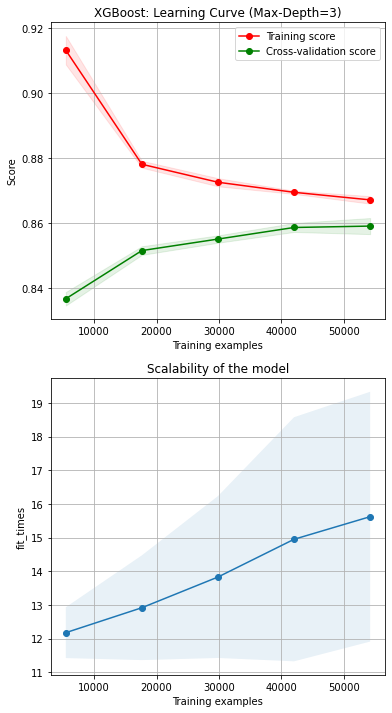

In [150]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

from sklearn.model_selection import learning_curve
clf_xg = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=3, \
                learning_rate=0.3)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    clf_xg,
    X_train,
    y_train,
    cv=4,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

fig, axs = plt.subplots(2, 1, figsize=(6,12)) 

axs[0].grid()
axs[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axs[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axs[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axs[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axs[0].legend(loc="best")
axs[0].set_xlabel("Training examples")
axs[0].set_ylabel("Score")
axs[0].set_title("XGBoost: Learning Curve (Max-Depth=3)")

axs[1].grid()
axs[1].plot(train_sizes, fit_times_mean, "o-")
axs[1].fill_between(
    train_sizes,
    fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std,
    alpha=0.1,
)
axs[1].set_xlabel("Training examples")
axs[1].set_ylabel("fit_times")
axs[1].set_title("Scalability of the model")

plt.show()
    

/Users/sanjeevsingh/opt/anaconda3/envs/py3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


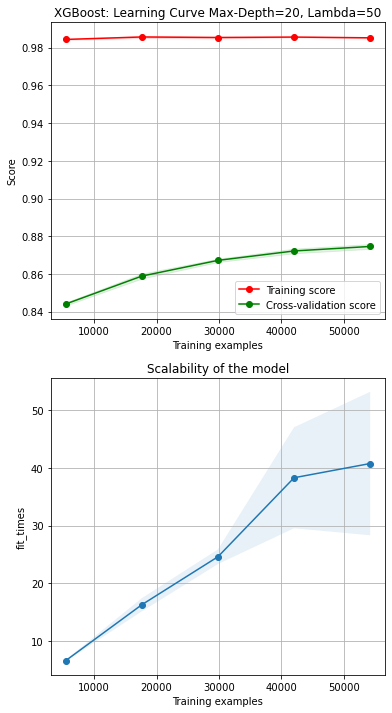

In [152]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

from sklearn.model_selection import learning_curve
clf_xg = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, \
                random_state=42, n_estimator=100, scale_pos_weight=1, \
                subsample=0.8, colsample_bytree=0.8, max_depth=20, \
                learning_rate=0.3, reg_alpha=0.1, reg_lambda=50)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    clf_xg,
    X_train,
    y_train,
    cv=4,
    n_jobs=2,
    train_sizes=np.linspace(0.1, 1.0, 5),
    return_times=True,
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

fig, axs = plt.subplots(2, 1, figsize=(6,12)) 

axs[0].grid()
axs[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axs[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axs[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axs[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axs[0].legend(loc="best")
axs[0].set_xlabel("Training examples")
axs[0].set_ylabel("Score")
axs[0].set_title("XGBoost: Learning Curve Max-Depth=20, Lambda=50")

axs[1].grid()
axs[1].plot(train_sizes, fit_times_mean, "o-")
axs[1].fill_between(
    train_sizes,
    fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std,
    alpha=0.1,
)
axs[1].set_xlabel("Training examples")
axs[1].set_ylabel("fit_times")
axs[1].set_title("Scalability of the model")

plt.show()
    

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=20, random_state=0).fit(X_train, y_train)
train_time = time.time() - start_time
print(f"train_time {train_time}")

train_time 128.05727529525757


In [165]:
from sklearn.metrics import classification_report, accuracy_score
from src.results.reporting import classification_report_2

y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(classification_report_2(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6966
           1       0.76      0.66      0.70      2077

    accuracy                           0.87      9043
   macro avg       0.83      0.80      0.81      9043
weighted avg       0.87      0.87      0.87      9043

Overall Accuracy: 87.27 %
Class 0 accuracy: 93.71 %
Class 1 accuracy: 65.67 %
Class 1 accuracy: 65.67 %
Specificity: 0.94
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |     6528    |     438     |  6966 |
| Actual 1 |     713     |     1364    |  2077 |
|  Total   |     7241    |     1802    |  9043 |
+----------+-------------+-------------+-------+
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6966
           1       0.76      0.66      0.70      2077

    accuracy              

In [158]:
x=np.load('/Users/sanjeevsingh/Dropbox/Courses/COSC522/FinalProject/numpy_data/xgboost_pca_pred.npy')

In [162]:
unique, counts = np.unique(x, return_counts=True)
dict(zip(unique, counts))

{0: 7461, 1: 1582}